<a href="https://colab.research.google.com/github/alessandrobruni/TensorflowDiabeticRetinopathy/blob/main/CNN_Diabetic_Retinopathy_kaggle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://drive.google.com/uc?export=view&id=1EfJKLRT0KnAyP2fuRZhQ2b1DlTqwbq6k"  width="300" height="auto" />   


---

# Diabetic Retinopathy Prediction
---
  
<br>
<img src="stuff/retina3.png"  width="1100" height="auto" />   




<BR>
<BR>


Computer vision is the practice of writing algorithms which can discover patterns in visual data, such as the camera of a self-driving car recognizing the car in front, or find memories in our viedos collection or simply classifing pictures for medical diagnostic.  


In this work a simple Convolutional Neural Network (CNN) will recognize up to **75%** of images with only **3.000 sample availables** .  

<img src="https://upload.wikimedia.org/wikipedia/commons/7/7c/Kaggle_logo.png"  width="60" height="auto" />  
The images came from this Kaggle  dataset: [Diabetic Retinopathy Arranged](https://www.kaggle.com/datasets/amanneo/diabetic-retinopathy-resized-arranged?select=0)  
In the datset images are divided in 5 folders (0,1,2,3,4), each of them represents specific class of retinopathy.  
* 0 - No DR
* 1 - Mild
* 2 - Moderate
* 3 - Severe
* 4 - Proliferative DR

In this case I will consider only 2 class of images:

*  **sane** retina (images from folder 0) 
*  **diabetics** retina (from folder 4).

The **Convolutional Neural Network** in **Tensorflow** &  **Keras**' cames with a tons of ready to use features that boost in speed the analysis, but there are some **rules** to follow. One of these rule is to set a specific folder structure so that images will flow into the CNN labeled, scaled, enhanced  etc... automatically.

I have created an utilites notebook that take the images and ouput a Zip file with the structure compliant with Tensorflow (CNN_Diabetic Retinopathy_loadfiles_v1.ipynb). 
Below the final structure in the zip file.  
<br>
<img src="https://drive.google.com/uc?export=view&id=1E4RvMW1zVOz7_1AGsByhJxYcjZhqh6ig" >








---


# Folder structure for classification
As said tha original dataset have 5 folders, each of them representing a specific class labels.  

* 0 - No DR - No Diabetic Retina: there are 25810 images. 
* 1 - Mild - Diabetic Retina Mild : there are 2443 images . 
* 2 - Moderate - Diabetic Retina Moderate : there are 5292 images 
* 3 - Severe - Diabetic Retina Severe : there are 873 images
* 4 - Proliferative DR - Diabetic Retina Proliferative : there are 708 images

There are a huge amount of images in  folder  0 and very less in the other.  
So **to avoid bias** in the  binary classification, the number of images of folder 0 have been randomly choosed and dounsampled to a number of the same order of the images in folder 4. 

The CNN performance are increased by several factor, one of these are the avaliable data.
To prove this, i have created 2 dataset:

* retina_severe1500_CNN.zip with 1.5k images (800 from folder 0 and 708 from folder 4) 
* retina_severe1800_CNN.zip with 1.8k images (here the 15% more are from folder 0) 
* retina_severe3k_CNN.zip with 3k images (here i have added folder 3 to the previouse zip file) 

Now let's see how many image we have for the two classes Sane/Diabetic in the retina_severe1500_CNN.zip file. 

In [15]:
import zipfile
import shutil
import os
#from numpy.lib.utils import source
import matplotlib.pyplot as plt
import random
import numpy as np

In [13]:
#Empty to prevent unclear trainig/validation data or FieExistError if the function runs several times
root_dir ='./retina1500'
if(os.path.exists(root_dir)):
  shutil.rmtree(root_dir)
  print(f"existing tree {root_dir} deleted.")

# Unzip the forst dataset 
local_zip = '/content/drive/MyDrive/Colab_Notebooks/retina/retina_severe1500_CNN.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall(root_dir)
zip_ref.close()
print(f"Unzipperd files in tree {root_dir} .")


existing tree ./retina1500 deleted.
Unzipperd files in tree ./retina1500 .


In [14]:

source_path = './retina1500/content/retina_CNN'


training_sane = os.path.join(source_path,'training/sane')
training_diabetic = os.path.join(source_path,'training/diabetic')
validation_sane = os.path.join(source_path,'validation/sane')
validation_diabetic = os.path.join(source_path,'validation/diabetic')

#os..listdir return a list containing all the files in the given path

# Walk through sane diabetic directory and list number of files
for dirpath, dirnames, filenames in os.walk(source_path):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in './retina1500/content/retina_CNN'.
There are 2 directories and 0 images in './retina1500/content/retina_CNN/training'.
There are 0 directories and 566 images in './retina1500/content/retina_CNN/training/diabetic'.
There are 0 directories and 640 images in './retina1500/content/retina_CNN/training/sane'.
There are 2 directories and 0 images in './retina1500/content/retina_CNN/validation'.
There are 0 directories and 142 images in './retina1500/content/retina_CNN/validation/diabetic'.
There are 0 directories and 160 images in './retina1500/content/retina_CNN/validation/sane'.


The images are splitted in ratio of
* **80% trainig** 
* **20% validation**.




---


# Binary Classification: Let's break it down

We can summarize classification steps as follows: 

1. Become one with the data (visualize, visualize, visualize)
2. Preprocess the data (prepared it for our model, the main step here was scaling/normalizing & turning our data into batches)
3. Create a model (start with a baseline)
4. Fit the model
5. Evaluate the model
6. Adjust different parameters (more CNN? more data?) and improve the model (try to beat  baseline)
7. Repeat until satisfied (experiment, experiment, experiment)  

<br>

<img src="https://drive.google.com/uc?export=view&id=1DoUNC0OL7BfVkfqM24D7oRMgLocvvjn-">




---


# 1. Display sample images 

Let's familiarize with sane retina and diabetics retina images (the shape of the original files are also displayed)

In [16]:
import matplotlib.image as vvimag
def view_random_images( target_dir, target_class):
  """
  Shows the image , no channel displayed 
  """
  #set up the directory
  folder_target = os.path.join(target_dir,target_class)

  #get random images
  random_images = random.sample(os.listdir(folder_target),9)
  plt.figure(figsize=(15,15))
  n = 1
  for im in random_images:
    plt.subplot(3,3,n)
    imag= vvimag.imread(os.path.join(folder_target,im))
    plt.imshow(imag)
    plt.title(f"target: {target_class} shape: {imag.shape} maxvalue: {np.max(imag)}")
    n= n+1
    plt.axis("off")
    #print(f"Image shape: {imag.shape}") # show the shape of the image


def view_random_images_sigleChannel( target_dir, target_class):
  """
  Shows the image and channel displayed 
  """
  #set up the directory
  folder_target = os.path.join(target_dir,target_class)

  #get random images
  random_images = random.sample(os.listdir(folder_target),3)
  plt.figure(figsize=(10,10))
  n = 1
  for im in random_images:
    imag= vvimag.imread(os.path.join(folder_target,im))
    plt.axis("off")
    plt.subplot(3,4,n).axis("off")
    plt.imshow(imag)
    plt.subplot(3,4,n+1).axis("off")
    plt.imshow(imag[:,:,0])
    plt.subplot(3,4,n+2).axis("off")
    plt.imshow(imag[:,:,1])
    plt.subplot(3,4,n+3).axis("off")
    plt.imshow(imag[:,:,2])
    plt.title(f"target: {target_class} \nshape: {imag.shape} \nmaxvalue: {np.max(imag)}")
    n= n+4


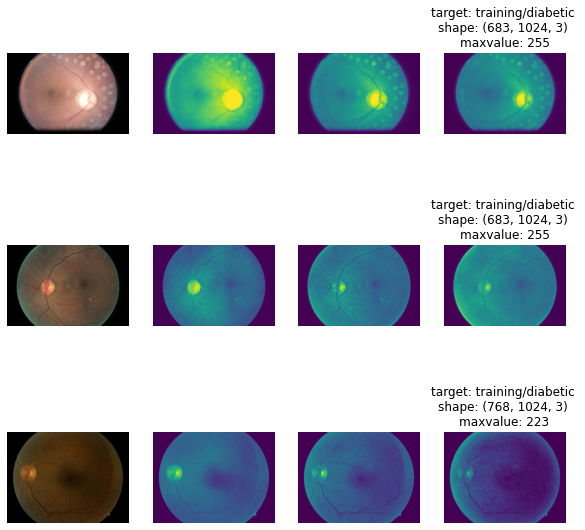

In [18]:
view_random_images_sigleChannel(source_path,"training/diabetic" )

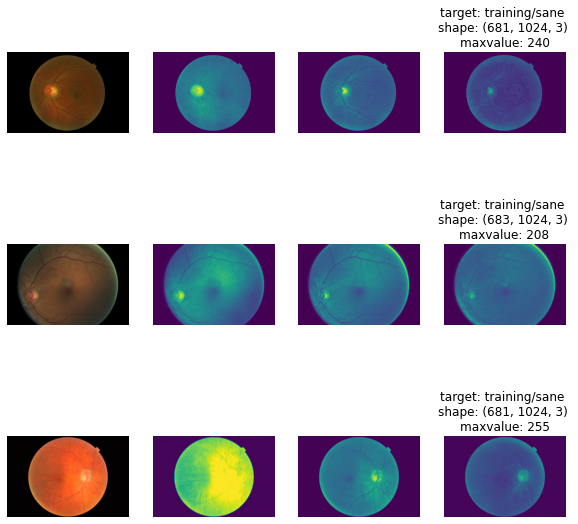

In [5]:
view_random_images_sigleChannel(source_path,"training/sane" )



---


# Function : show images chained in layers

This helper function will display the processed images in the CNN layers.  
In this way it is possible to see how the feature and patter extraction work when the image is deepened into the convolutional layers.

In [17]:
import numpy as np
import random
from tensorflow.keras.utils import img_to_array, load_img

def show_image_chained_layers( model, x_size = 300 , y_size = 300, label = 0  , source_path = './retina/content/retina_CNN'):
  """
  This function take a model as input,randomly choose an image 
  and will output intermediate representations for all layers after
  the first.

  model : the model to inspect
  x_size, y_size : the input_shape of the model's first layer
  label : 0/1 are class as defined in the directories  (diabetic = 0 because  is the first folder )
  source_images : the root directory   
  """
  train_sane = os.path.join(source_path, 'training/sane')
  train_diabetic = os.path.join(source_path, 'training/diabetic')

  train_sane_images = os.listdir(training_sane)
  train_diabetics_images = os.listdir(training_diabetic)
  
  print(f'TRAIN SET # of images of retina SANE: {len(train_sane_images)}')
  print(f'TRAIN SET # of images of retina SANE: {len(train_diabetics_images)}')

  print(f'first 2  SANE: {train_sane_images[:2]}')
  print(f'first 2  DIABETIC: {train_diabetics_images[:2]}')

  # Define a new Model that will take an image as input, and will output
  # intermediate representations for all layers in the previous model after
  # the first.

  successive_outputs = [layer.output for layer in model.layers[1:]]
  visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)

  # Prepare a random input image from the training set.
  sane_img_files = [os.path.join(training_sane, f) for f in train_sane_images]
  diabetic_img_files = [os.path.join(training_diabetic, f) for f in train_diabetics_images]
  
  #choose file type
  img_path =   random.choice(sane_img_files) if label == 0 else random.choice(diabetic_img_files)

  print(f'/n showinh image : {img_path}')

  #img = load_img(img_path, target_size=(300, 300))  # this is a PIL image
  plt.imshow(load_img(img_path), aspect='auto')
  plt.figure()

  img = load_img(img_path, target_size=(x_size, y_size))  # this is a PIL image
  x = img_to_array(img)  # Numpy array with shape (300, 300, 3)
  x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 300, 300, 3)

  # Scale by 1/255
  x /= 255

  # Run the image through the network, thus obtaining all
  # intermediate representations for this image.
  successive_feature_maps = visualization_model.predict(x)

  # These are the names of the layers, so you can have them as part of the plot
  layer_names = [layer.name for layer in model.layers[1:]]

  # Display the representations
  for layer_name, feature_map in zip(layer_names, successive_feature_maps):
    if len(feature_map.shape) == 4:
      #print(feature_map.shape)

      # Just do this for the conv / maxpool layers, not the fully-connected layers
      n_features = feature_map.shape[-1]  # number of features in feature map

      # The feature map has shape (1, size, size, n_features)
      size = feature_map.shape[1]
      size_1 = feature_map.shape[2]

      
     
      # Tile the images in this matrix
      display_grid = np.zeros((size, size_1* n_features))
      #print(display_grid.shape)
      for i in range(n_features):
        x = feature_map[0, :, :, i]
        x -= x.mean()
        x /= x.std()
        x *= 64
        x += 128
        x = np.clip(x, 0, 255).astype('uint8')

        #print(feature_map.shape)
        #print(f"x {x.shape}")
        #print(f"{ i * (size + size_1)} : {(i + 1) * (size + size_1)}")
        # Tile each filter into this big horizontal grid
        display_grid[:, i * (size_1 ) : (i + 1) * (size_1)] = x
      
      # Display the grid
      scale = 20. / n_features
      plt.figure(figsize=(scale * n_features, scale))
      plt.title(layer_name)
      plt.grid(False)
      plt.imshow(display_grid, aspect='auto', cmap='viridis')



---


# Function : plot loss curves

To see how a model is performing, this function shows the **accuracy** and **loss** curves on both training and validation dataset .

In [30]:
# Plot the validation and training curves separately 
import matplotlib.ticker as mtick

def show_performance(history):
  """
  Returns separate loss curves for training and validation metrics.
  """
  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epochs = range(len(history.history["loss"])) # how many epochs did we run for?

  # Plot loss
  plt.figure(figsize=(20,5)) 
  plt.subplot(1,2,1)
  plt.plot(epochs, loss, label="training_loss")
  plt.plot(epochs, val_loss, label="val_loss")
  plt.title("loss")
  plt.xlabel("epochs")
  plt.ylim(0,3)
  plt.legend()

  # Plot accuracy
  plt.subplot(1,2,2)
  plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))

  plt.plot(epochs, accuracy, label="training_accuracy")
  plt.plot(epochs, val_accuracy, label="val_accuracy")
  plt.title("accuracy")
  plt.xlabel("epochs")
  plt.ylim(0.5,1)
  plt.legend();



---


# 2. Preprocess the data (prepare it for a model)

First rescale the data (dividing by max color values 255.) .  

Next step is to turn our data into batches.
A batch is a small subset of data. Rather than look at all ~10,000 images at one time, a model might only look at 32&64 or 128 at a time.

It does this for a couple of reasons:

* 10,000 images (or more) might not fit into the memory of your processor (GPU).
* Trying to learn the patterns in 10,000 images in one hit could result in the model not being able to learn very well.  

Why 32?
Because 32 is good for your health... https://twitter.com/ylecun/status/989610208497360896?s=20

But for speed up, in Colab with GPU avaliable, it can be also setted to 64 or 128 (my experience)

Than flow the images ... this is the power of ImagedataGenerato, it generates bach of images, and create tensors (arrays) of image data from the directories,  with real time data augmentation if needed.

In [19]:
TRAIN_DIR = os.path.join(source_path,'training')
VALIDATION_DIR = os.path.join(source_path,'validation')

#create train and test generators and rescale the data
#here came the handy use of the directory setted before
import tensorflow as tf
from tensorflow.keras. preprocessing.image import ImageDataGenerator

#target size of the images
#note that it resize automatically.
#instead of setting the defaul (300,300), in this case even if it is not necessary i have halfed the original size
# (340, 510)


train_generator = ImageDataGenerator(rescale=1/255.)  
validation_generator = ImageDataGenerator(rescale= 1/255.)

train_data = train_generator.flow_from_directory(  
    directory = TRAIN_DIR,   # target direcory of the images
    target_size = (340, 510), 
    class_mode ='binary',
    batch_size = 32
)
validation_data = validation_generator.flow_from_directory(  
    directory = VALIDATION_DIR,   # target direcory of the images
    target_size = (340, 510), #target size of the images, note tha it resamples automatically
    class_mode ='binary',
    batch_size = 32)


Found 1206 images belonging to 2 classes.
Found 302 images belonging to 2 classes.


In [22]:
image, labels = train_data.next() #get the next batch of images
print(f"{image.shape} , {labels.shape}")

(32, 340, 510, 3) , (32,)


Text(0.5, 1.0, '0.0')

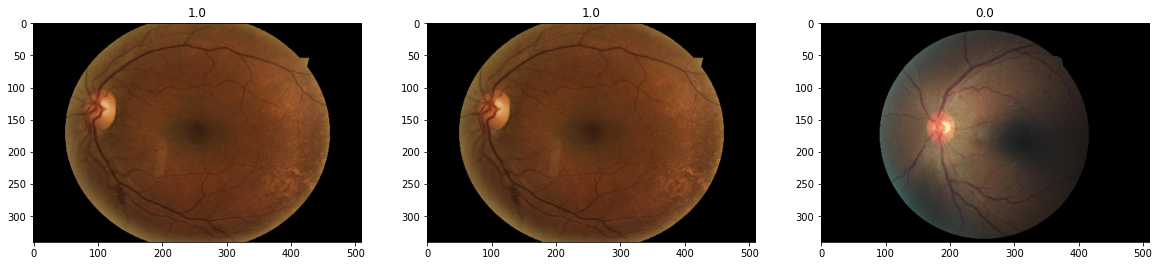

In [28]:
#we have batches of 32 images 
plt.figure(figsize=(20,20))
plt.subplot(1,3,1)
ix = random.randint(0,image.shape[0])
plt.imshow(image[ix])
plt.title(labels[ix])
plt.subplot(1,3,2)
ix = random.randint(0,image.shape[0])
plt.imshow(image[ix])
plt.title(labels[ix])
plt.subplot(1,3,3)
ix = random.randint(0,image.shape[0])
plt.imshow(image[ix])
plt.title(labels[ix])


In [24]:
#how many train batches we have for training datasets
len(train_data)

38

In [25]:
np.max(image[:1]) # ok are scaled

0.58431375

In [26]:
# view the first batch of labels, they have been hot incoded autoamtically
labels

array([0., 0., 1., 0., 0., 1., 1., 0., 1., 0., 0., 1., 1., 1., 0., 1., 1.,
       1., 0., 1., 1., 1., 1., 0., 1., 0., 0., 0., 1., 1., 1., 1.],
      dtype=float32)



---


#3. Baseline : create a CNN model (start with a baseline) CONV(10 10 10)
A baseline is a relatively simple model or existing result that you setup when beginning a machine learning experiment and then as you keep experimenting, you try to beat the baseline.
A baseline is the minimum composition of a CNN, like this one  :
* Conv + ReLU (extract non linear features)
* Pooling (downscaling)
* Flatten (make 1 dimension)
* Dense (connect to neurons)  

<br>
<img src="https://drive.google.com/uc?export=view&id=1l_k6ZKskPw4pSLIHbVBc7NzS3GPmBk1H" 
width=900px  height="auto" >

In [20]:
# Make the creating of our model a little easier
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation, BatchNormalization
from tensorflow.keras import Sequential

In the baseline notable is that there is only 1 neuron waiting the output of the Flatten layer! 

Well despite of this the model is learning reaching:

* Accuracy training : **97%**  
* Accuracy validation : **61%**  

There is **ovefitting** because the **validation curves diverges** 30ppb from the training one **61%**.

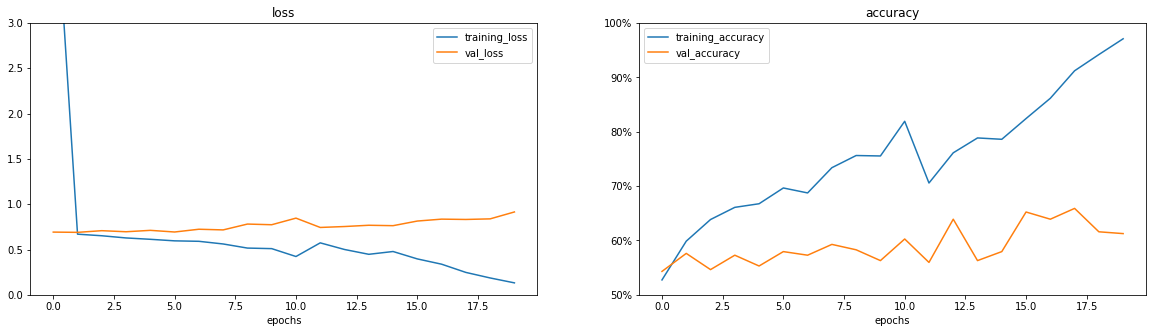

In [32]:
show_performance(model_baseline.history)

In [36]:
model_baseline = Sequential([
    Conv2D(filters= 10,             #is the # of sliding windows going across the images input (higher = more caomplex model)
           kernel_size=(3,3),       # the size of the sliding windows      
           padding = 'valid',       #  if "same", output shape is same as input shape, if "valid", output shape gets compressed
           input_shape= (340, 510,3),# the input specific shape 228,342
           activation="relu"),
    Conv2D(10,3, activation='relu'),
    Conv2D(10,3, activation='relu'),
    Flatten(),
    Dense(1, activation='sigmoid')
])

# add loss metrics and optimizer 
model_baseline.compile(
    optimizer = Adam(),
    loss = 'binary_crossentropy',
    metrics = ['accuracy']
)

# view the CNN
model_baseline.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 338, 508, 10)      280       
                                                                 
 conv2d_13 (Conv2D)          (None, 336, 506, 10)      910       
                                                                 
 conv2d_14 (Conv2D)          (None, 334, 504, 10)      910       
                                                                 
 flatten_4 (Flatten)         (None, 1683360)           0         
                                                                 
 dense_4 (Dense)             (None, 1)                 1683361   
                                                                 
Total params: 1,685,461
Trainable params: 1,685,461
Non-trainable params: 0
_________________________________________________________________


TRAIN SET # of images of retina SANE: 640
TRAIN SET # of images of retina SANE: 566
first 2  SANE: ['43923_left.jpeg', '28245_left.jpeg']
first 2  DIABETIC: ['31984_left.jpeg', '23422_left.jpeg']
/n showinh image : ./retina1500/content/retina_CNN/training/diabetic/38653_left.jpeg
1/1 [==============================] - 7s 7s/step


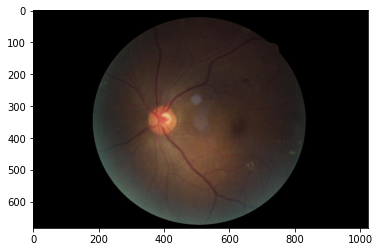

<Figure size 432x288 with 0 Axes>

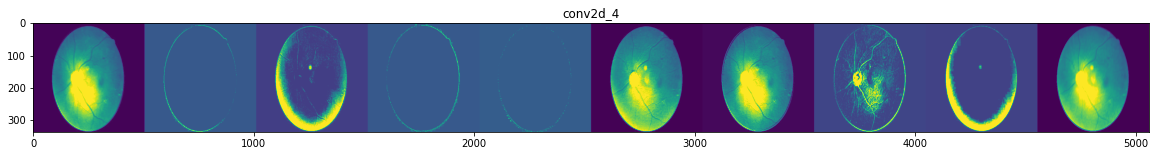

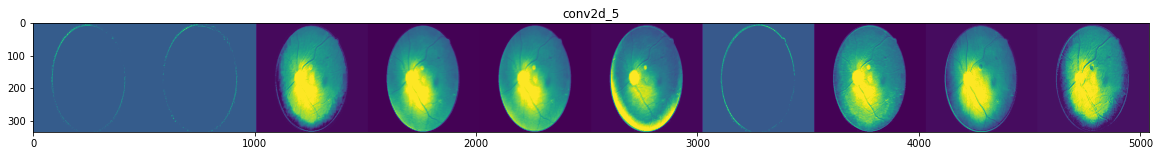

In [32]:
#just let us see how the computer view these images   
show_image_chained_layers(model_baseline,340,510, 1)

In [22]:
#lets run the training
model_baseline.fit(
    train_data,
    epochs=20,
    steps_per_epoch= len(train_data),
    validation_data = validation_data,
    validation_steps = len(validation_data)
)

Epoch 1/20
38/38 [==============================] - 31s 573ms/step - loss: 4.8318 - accuracy: 0.5274 - val_loss: 0.6921 - val_accuracy: 0.5430
Epoch 2/20
38/38 [==============================] - 20s 522ms/step - loss: 0.6693 - accuracy: 0.5987 - val_loss: 0.6893 - val_accuracy: 0.5762
Epoch 3/20
38/38 [==============================] - 20s 524ms/step - loss: 0.6517 - accuracy: 0.6385 - val_loss: 0.7077 - val_accuracy: 0.5464
Epoch 4/20
38/38 [==============================] - 20s 524ms/step - loss: 0.6275 - accuracy: 0.6609 - val_loss: 0.6959 - val_accuracy: 0.5728
Epoch 5/20
38/38 [==============================] - 20s 524ms/step - loss: 0.6126 - accuracy: 0.6675 - val_loss: 0.7114 - val_accuracy: 0.5530
Epoch 6/20
38/38 [==============================] - 20s 525ms/step - loss: 0.5955 - accuracy: 0.6965 - val_loss: 0.6931 - val_accuracy: 0.5795
Epoch 7/20
38/38 [==============================] - 20s 521ms/step - loss: 0.5904 - accuracy: 0.6874 - val_loss: 0.7236 - val_accuracy: 0.5728



---


# Overfitting : adjust the model parameters  

Fitting a machine learning model comes in 3 steps:
* Create a baseline

* Beat the baseline by overfitting a larger model

* Reduce overfitting  

<br>

🔑 Note: When a model's validation accuracy starts to diverge, it's likely that the model is overfitting the training dataset. This means, it's learning the patterns in the training dataset too well and thus the model's ability to generalize to unseen data will be diminished.


<br><img src="https://drive.google.com/uc?export=view&id=15KOOnrYanTpMjKpHYOmQTZBVjX6xuNgW" 
width=500px  height="auto" align="center"><br><br>  



**Ways to induce overfitting:**

* Increase the number of conv layers

* Increase the number of conv filters

* Add another dense layer to the output of our flattened layer  

**Reduce overfitting:**

* Add regularization layers (such as MaxPool2D)

* Add data augmentation

* Add more data...  

🔑 Note: Reducing overfitting is also known as regularization.



---


# Baseline 1 - introducing MaxPool layers to CONV(10 10 10)

Try to add Maxpool layers to te base line 
* condenses the features taking only the most important one 
* adding MaxPool2D to contrast overfitting

Model baseline 1 is doing worst, but because the training accuracy is more close to validation this menas that there is less overfitting .  

Well, the model is learning reaching:

* Accuracy training : **79%**  
* Accuracy validation : **68%**  
* input image to Dense layers : 40x62 pixel

There is **ovefitting** because the **validation curves diverges** 11bp from the training one **68%**.

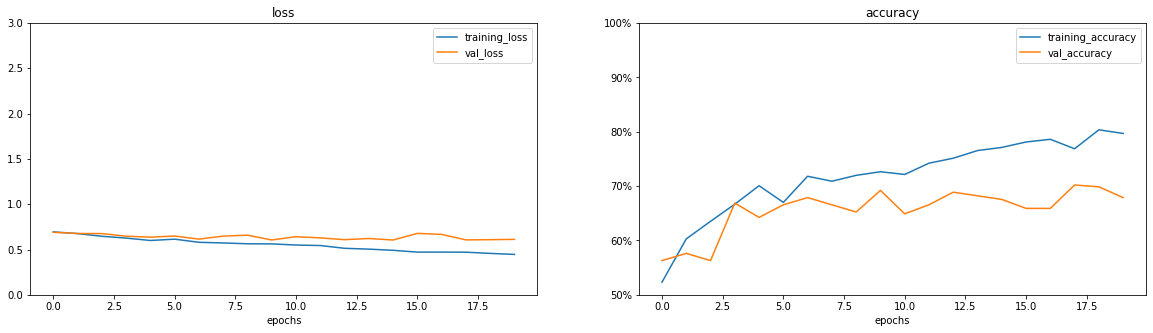

In [40]:
show_performance(model_baseline1.history)

In [34]:
# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1/255)
validation_datagen = ImageDataGenerator(rescale=1/255)

# Flow training images in batches of 128 using train_datagen generator
train_data = train_datagen.flow_from_directory(
        TRAIN_DIR,  
        target_size=(340, 510),
        batch_size=32,
        class_mode='binary')

# Flow validation images in batches of 128 using validation_datagen generator
validation_data = validation_datagen.flow_from_directory(
        VALIDATION_DIR,  
        target_size=(340, 510), 
        batch_size=32,
        class_mode='binary')
#
model_baseline1 = Sequential([
    Conv2D(10,(3,3),activation = "relu",input_shape=(340,510,3)),
    MaxPool2D(pool_size=2),
    Conv2D(10,(3,3),activation = "relu"),   
    MaxPool2D(),
    Conv2D(10,(3,3), activation= "relu"),
    MaxPool2D(),
    Flatten(),
    #Dense(10, activation= "relu"),
    Dense(1, activation= "sigmoid")
])
model_baseline1.compile( loss = "binary_crossentropy",
                 optimizer = Adam(),
                 metrics = ["accuracy"])
model_baseline1.summary()

Found 1206 images belonging to 2 classes.
Found 302 images belonging to 2 classes.
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 338, 508, 10)      280       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 169, 254, 10)     0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 167, 252, 10)      910       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 83, 126, 10)      0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, 81, 124, 10)       910       
                                     

Showing the images in the CONV Net , now we cam see how the image are becomeing smaller and have more contrast , this is the effect of the MaxPool. 

TRAIN SET # of images of retina SANE: 640
TRAIN SET # of images of retina SANE: 566
first 2  SANE: ['43923_left.jpeg', '28245_left.jpeg']
first 2  DIABETIC: ['31984_left.jpeg', '23422_left.jpeg']
/n showinh image : ./retina1500/content/retina_CNN/training/diabetic/29839_right.jpeg
1/1 [==============================] - 0s 217ms/step


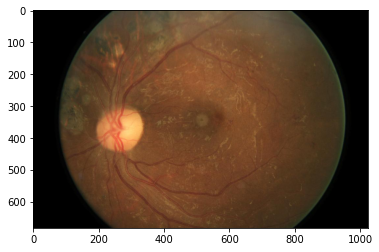

<Figure size 432x288 with 0 Axes>

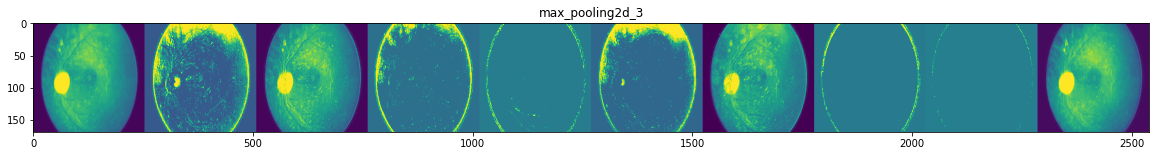

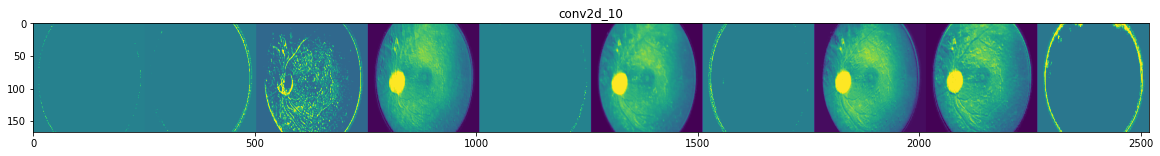

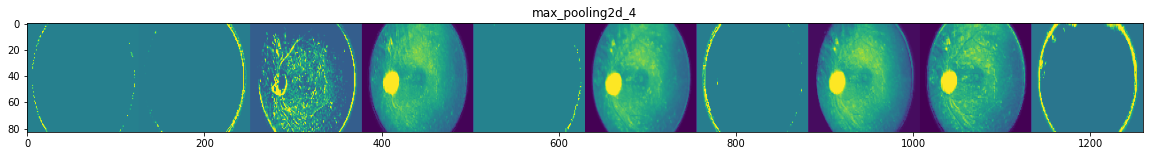

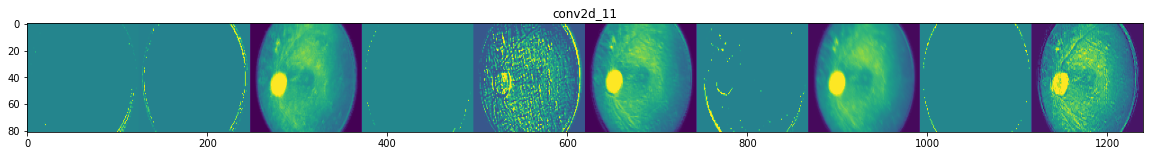

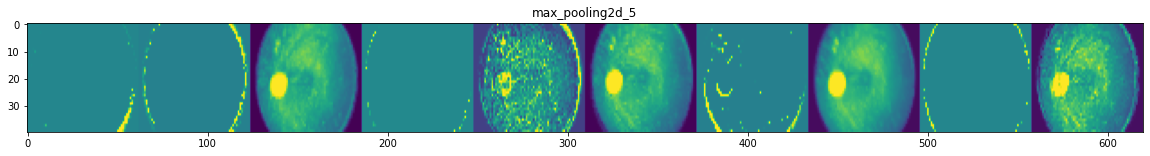

In [35]:
#just let us see how the computer view these images   
show_image_chained_layers(model_baseline1,340,510, 1)

In [37]:
model_baseline1.fit(
    train_data ,
    epochs=20,
    steps_per_epoch= len(train_data),
    validation_data = validation_data,
    validation_steps = len(validation_data)
)

Epoch 1/20
38/38 [==============================] - 20s 504ms/step - loss: 0.6947 - accuracy: 0.5232 - val_loss: 0.6896 - val_accuracy: 0.5629
Epoch 2/20
38/38 [==============================] - 19s 493ms/step - loss: 0.6758 - accuracy: 0.6028 - val_loss: 0.6769 - val_accuracy: 0.5762
Epoch 3/20
38/38 [==============================] - 19s 487ms/step - loss: 0.6460 - accuracy: 0.6352 - val_loss: 0.6755 - val_accuracy: 0.5629
Epoch 4/20
38/38 [==============================] - 19s 490ms/step - loss: 0.6258 - accuracy: 0.6667 - val_loss: 0.6467 - val_accuracy: 0.6689
Epoch 5/20
38/38 [==============================] - 18s 481ms/step - loss: 0.5995 - accuracy: 0.7007 - val_loss: 0.6360 - val_accuracy: 0.6424
Epoch 6/20
38/38 [==============================] - 19s 492ms/step - loss: 0.6141 - accuracy: 0.6700 - val_loss: 0.6489 - val_accuracy: 0.6656
Epoch 7/20
38/38 [==============================] - 20s 530ms/step - loss: 0.5796 - accuracy: 0.7181 - val_loss: 0.6146 - val_accuracy: 0.6788



---


# Baseline 2 : same as Baseline 1 + adding few neurons at the end of CONV(10 10 10) 

We can try to help that single neuron after the flatten layer. 

Just added 10 Dense neurons at the enad of the Flatten layr of the baseline model.  

Model_baseline2 is doing worst, but  validation loss is decreased with less overfitting because the accuracy are more close now.  

Well, the model is learning reaching:

* Accuracy training : **70%**  
* Accuracy validation : **63%**  
* input image to Dense layers : 40x62 pixel


There is **even less ovefitting** because the **validation curves diverges** 7bp from the training one **63%**.

Ok but the accurancy are decreasing

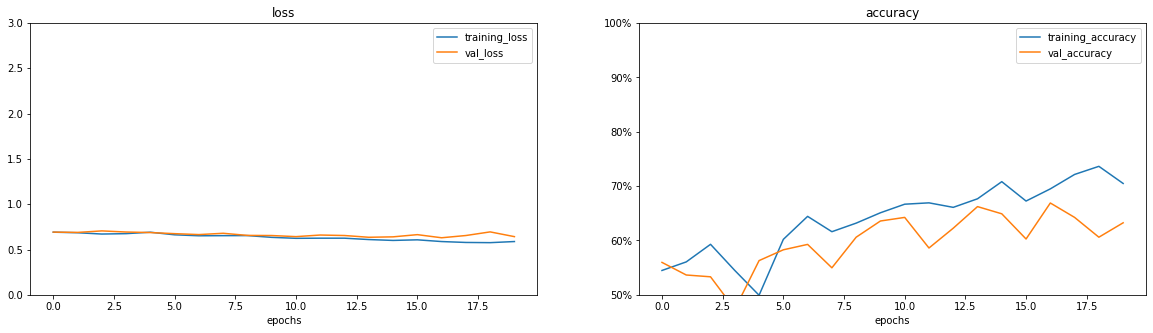

In [46]:
show_performance(model_baseline2.history)

In [41]:
# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1/255)
validation_datagen = ImageDataGenerator(rescale=1/255)

# Flow training images in batches of 128 using train_datagen generator
train_data = train_datagen.flow_from_directory(
        TRAIN_DIR,  
        target_size=(340, 510),
        batch_size=32,
        class_mode='binary')

# Flow validation images in batches of 128 using validation_datagen generator
validation_data = validation_datagen.flow_from_directory(
        VALIDATION_DIR,  
        target_size=(340, 510), 
        batch_size=32,
        class_mode='binary')
#
model_baseline2 = Sequential([
    Conv2D(10,(3,3),activation = "relu",input_shape=(340,510,3)),
    MaxPool2D(pool_size=2),
    Conv2D(10,(3,3),activation = "relu"),   
    MaxPool2D(),
    Conv2D(10,(3,3), activation= "relu"),
    MaxPool2D(),
    Flatten(),
    Dense(10, activation= "relu"),
    Dense(1, activation= "sigmoid")
])
model_baseline2.compile( loss = "binary_crossentropy",
                 optimizer = Adam(),
                 metrics = ["accuracy"])
model_baseline2.summary()

Found 1206 images belonging to 2 classes.
Found 302 images belonging to 2 classes.
Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 338, 508, 10)      280       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 169, 254, 10)     0         
 2D)                                                             
                                                                 
 conv2d_19 (Conv2D)          (None, 167, 252, 10)      910       
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 83, 126, 10)      0         
 g2D)                                                            
                                                                 
 conv2d_20 (Conv2D)          (None, 81, 124, 10)       910       
                                     

TRAIN SET # of images of retina SANE: 640
TRAIN SET # of images of retina SANE: 566
first 2  SANE: ['43923_left.jpeg', '28245_left.jpeg']
first 2  DIABETIC: ['31984_left.jpeg', '23422_left.jpeg']
/n showinh image : ./retina1500/content/retina_CNN/training/sane/74_left.jpeg
1/1 [==============================] - 0s 141ms/step


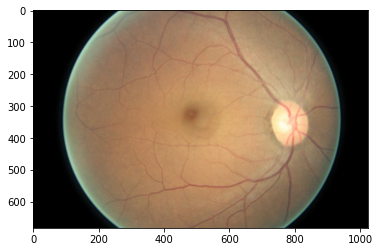

<Figure size 432x288 with 0 Axes>

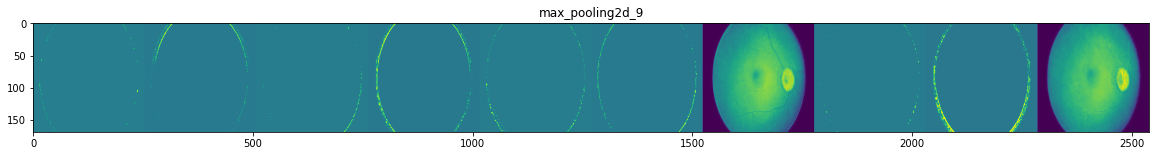

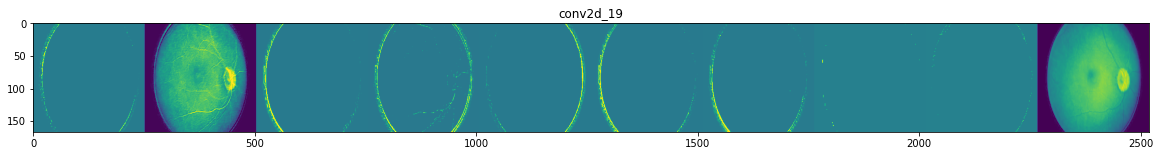

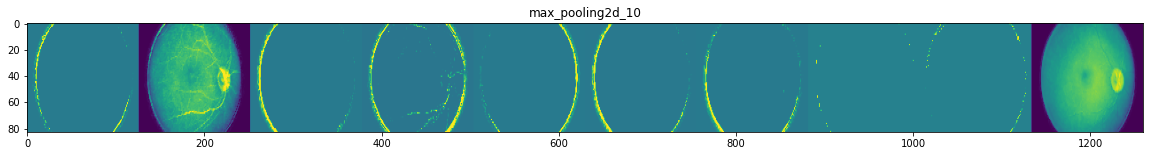

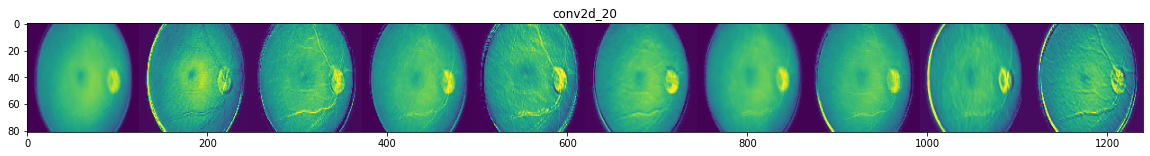

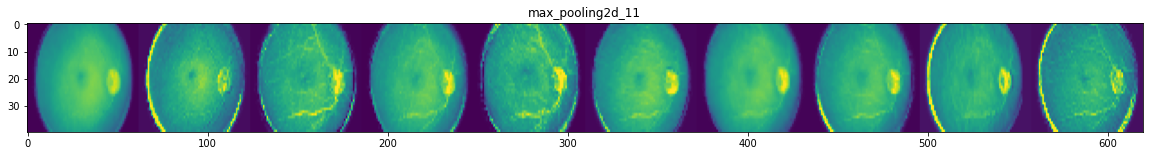

In [43]:
show_image_chained_layers(model_baseline2,340,510, 0)

Nothing changed in the structur of the convolution.

In [44]:
model_baseline2.fit(
    train_data ,
    epochs=20,
    steps_per_epoch= len(train_data),
    validation_data = validation_data,
    validation_steps = len(validation_data)
)

Epoch 1/20
38/38 [==============================] - 20s 509ms/step - loss: 0.6911 - accuracy: 0.5448 - val_loss: 0.6919 - val_accuracy: 0.5596
Epoch 2/20
38/38 [==============================] - 19s 502ms/step - loss: 0.6851 - accuracy: 0.5605 - val_loss: 0.6885 - val_accuracy: 0.5364
Epoch 3/20
38/38 [==============================] - 23s 605ms/step - loss: 0.6706 - accuracy: 0.5929 - val_loss: 0.7053 - val_accuracy: 0.5331
Epoch 4/20
38/38 [==============================] - 19s 492ms/step - loss: 0.6750 - accuracy: 0.5448 - val_loss: 0.6930 - val_accuracy: 0.4735
Epoch 5/20
38/38 [==============================] - 20s 533ms/step - loss: 0.6908 - accuracy: 0.4992 - val_loss: 0.6869 - val_accuracy: 0.5629
Epoch 6/20
38/38 [==============================] - 19s 497ms/step - loss: 0.6621 - accuracy: 0.6020 - val_loss: 0.6749 - val_accuracy: 0.5828
Epoch 7/20
38/38 [==============================] - 19s 492ms/step - loss: 0.6514 - accuracy: 0.6443 - val_loss: 0.6647 - val_accuracy: 0.5927



---


#Baseline 3  - Augmenting neurons in the Convolution layers CONV(10 32 64)

Model_baseline 3 is doing worst, adding more neurons to this 3 convolution layers didn't improve the model .

This model have **1,6 milions** neurons compared to the **250k** of the preceding model

Well, here the performance after 30 epochs:

* Accuracy training : **89%**
* Accuracy validation : **69%**
* input image to Dense layers : 40x62 pixel  


There is even more ovefitting because the validation curves diverges 20bp from the training one.



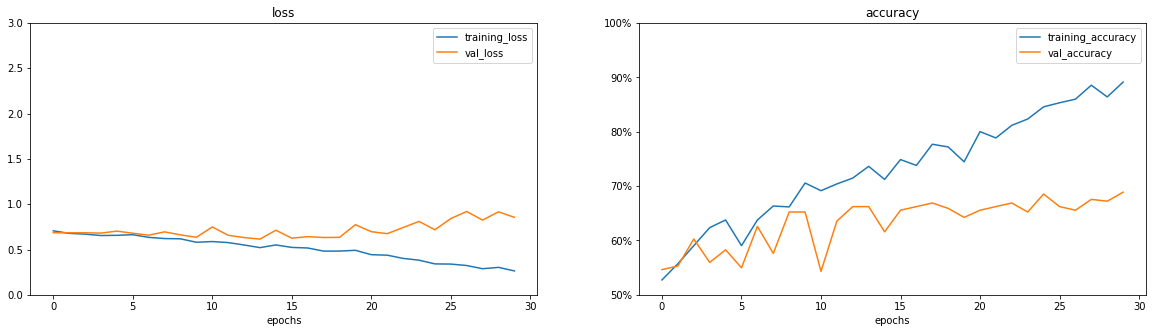

In [65]:
show_performance(model_baseline3.history)

In [61]:
# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1/255)
validation_datagen = ImageDataGenerator(rescale=1/255)

# Flow training images in batches of 128 using train_datagen generator
train_data = train_datagen.flow_from_directory(
        TRAIN_DIR,  
        target_size=(340, 510),
        batch_size=32,
        class_mode='binary')

# Flow validation images in batches of 128 using validation_datagen generator
validation_data = validation_datagen.flow_from_directory(
        VALIDATION_DIR,  
        target_size=(340, 510), 
        batch_size=32,
        class_mode='binary')
#

model_baseline3 = Sequential([
    Conv2D(10,(3,3),activation = "relu",input_shape=(340,510,3)),
    MaxPool2D(pool_size=2),
    Conv2D(32,(3,3),activation = "relu"),   
    MaxPool2D(),
    Conv2D(64,(3,3), activation= "relu"),
    MaxPool2D(),
    Flatten(),
    Dense(10, activation= "relu"),
    Dense(1, activation= "sigmoid")
])
model_baseline3.compile( loss = "binary_crossentropy",
                 optimizer = Adam(),
                 metrics = ["accuracy"])
model_baseline3.summary()

Found 1206 images belonging to 2 classes.
Found 302 images belonging to 2 classes.
Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_39 (Conv2D)          (None, 338, 508, 10)      280       
                                                                 
 max_pooling2d_30 (MaxPoolin  (None, 169, 254, 10)     0         
 g2D)                                                            
                                                                 
 conv2d_40 (Conv2D)          (None, 167, 252, 32)      2912      
                                                                 
 max_pooling2d_31 (MaxPoolin  (None, 83, 126, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_41 (Conv2D)          (None, 81, 124, 64)       18496     
                                    

TRAIN SET # of images of retina SANE: 640
TRAIN SET # of images of retina SANE: 566
first 2  SANE: ['43923_left.jpeg', '28245_left.jpeg']
first 2  DIABETIC: ['31984_left.jpeg', '23422_left.jpeg']
/n showinh image : ./retina1500/content/retina_CNN/training/sane/32277_right.jpeg
1/1 [==============================] - 0s 80ms/step


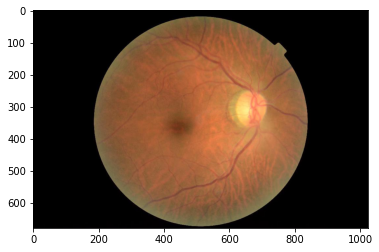

<Figure size 432x288 with 0 Axes>

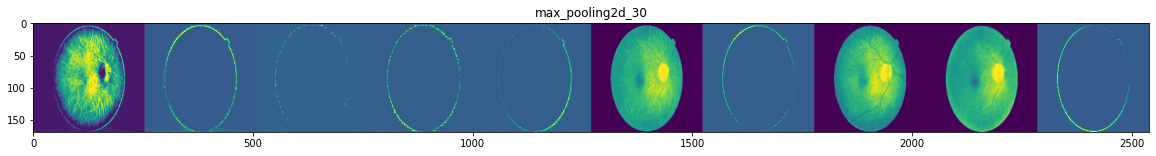

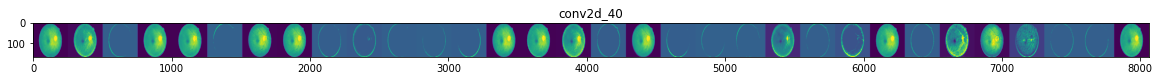

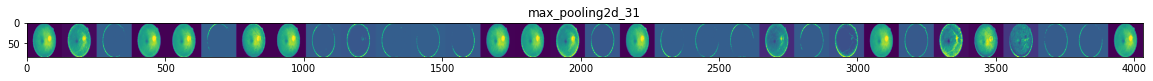

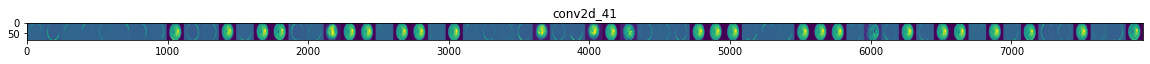

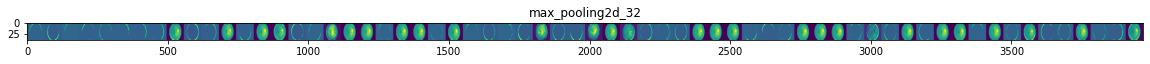

In [63]:
show_image_chained_layers(model_baseline3,340,510, 0)

In [64]:
model_baseline3.fit(
    train_data ,
    epochs=30,
    steps_per_epoch= len(train_data),
    validation_data = validation_data,
    validation_steps = len(validation_data)
)

Epoch 1/30
38/38 [==============================] - 19s 497ms/step - loss: 0.7062 - accuracy: 0.5274 - val_loss: 0.6856 - val_accuracy: 0.5464
Epoch 2/30
38/38 [==============================] - 19s 487ms/step - loss: 0.6780 - accuracy: 0.5572 - val_loss: 0.6842 - val_accuracy: 0.5530
Epoch 3/30
38/38 [==============================] - 19s 491ms/step - loss: 0.6696 - accuracy: 0.5904 - val_loss: 0.6846 - val_accuracy: 0.6026
Epoch 4/30
38/38 [==============================] - 19s 488ms/step - loss: 0.6543 - accuracy: 0.6235 - val_loss: 0.6809 - val_accuracy: 0.5596
Epoch 5/30
38/38 [==============================] - 19s 493ms/step - loss: 0.6564 - accuracy: 0.6376 - val_loss: 0.7031 - val_accuracy: 0.5828
Epoch 6/30
38/38 [==============================] - 19s 486ms/step - loss: 0.6635 - accuracy: 0.5904 - val_loss: 0.6795 - val_accuracy: 0.5497
Epoch 7/30
38/38 [==============================] - 19s 489ms/step - loss: 0.6340 - accuracy: 0.6376 - val_loss: 0.6581 - val_accuracy: 0.6258



---


# Model 1 : CONV (16 32 64 64 64 )
I try with 5 CONV layers that extract features and compact the pictures in 8x14 pixel images.  

This model have **1,3 milions** neurons and **5 CONVS**

Well, here the performance after 30 epochs:

* Accuracy training : **94%**
* Accuracy validation : **69%** flat here 
* Input image to Dense layers : 8x14 pixel  


There is even more ovefitting because the validation curves diverges 25bp from the training one.
So even increasing layers and neurons seem that nothin change.
In other situation i have seen that this model work bery well.
But here we have images that are quite similar in the 2 classes!

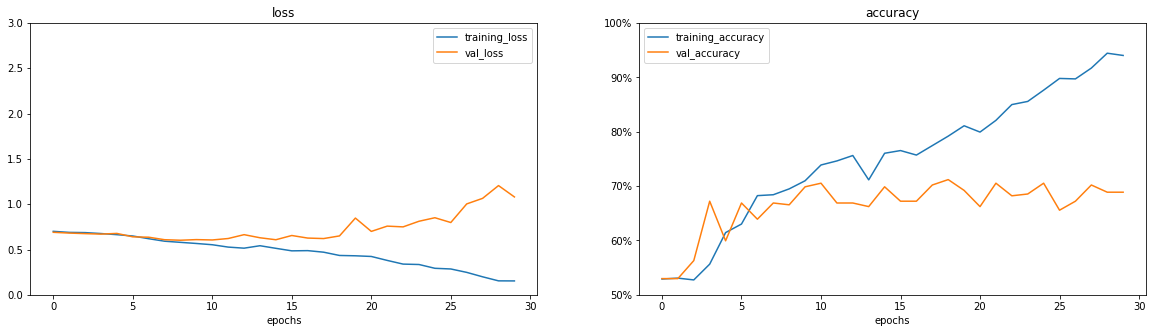

In [69]:
show_performance(model_conv1.history)

In [66]:
# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1/255)
validation_datagen = ImageDataGenerator(rescale=1/255)

# Flow training images in batches of 128 using train_datagen generator
train_data = train_datagen.flow_from_directory(
        TRAIN_DIR,  
        target_size=(340, 510),
        batch_size=32,
        class_mode='binary')

# Flow validation images in batches of 128 using validation_datagen generator
validation_data = validation_datagen.flow_from_directory(
        VALIDATION_DIR,  
        target_size=(340, 510), 
        batch_size=32,
        class_mode='binary')
#

model_conv1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(340, 510, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    # Only 1 output neuron. It will contain a value 
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model_conv1.compile( loss = "binary_crossentropy",
                 optimizer = Adam(),
                 metrics = ["accuracy"])
model_conv1.summary()



Found 1206 images belonging to 2 classes.
Found 302 images belonging to 2 classes.
Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_42 (Conv2D)          (None, 338, 508, 16)      448       
                                                                 
 max_pooling2d_33 (MaxPoolin  (None, 169, 254, 16)     0         
 g2D)                                                            
                                                                 
 conv2d_43 (Conv2D)          (None, 167, 252, 32)      4640      
                                                                 
 max_pooling2d_34 (MaxPoolin  (None, 83, 126, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_44 (Conv2D)          (None, 81, 124, 64)       18496     
                                    

TRAIN SET # of images of retina SANE: 640
TRAIN SET # of images of retina SANE: 566
first 2  SANE: ['43923_left.jpeg', '28245_left.jpeg']
first 2  DIABETIC: ['31984_left.jpeg', '23422_left.jpeg']
/n showinh image : ./retina1500/content/retina_CNN/training/sane/23236_left.jpeg
1/1 [==============================] - 0s 494ms/step


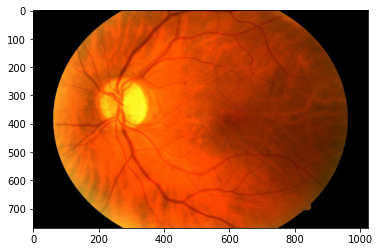

<Figure size 432x288 with 0 Axes>

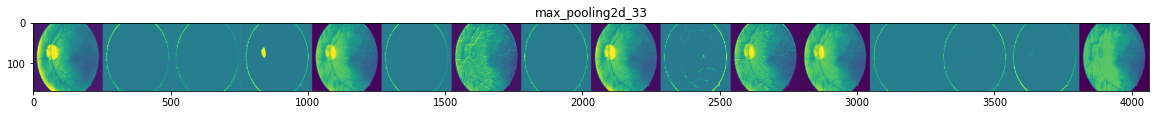

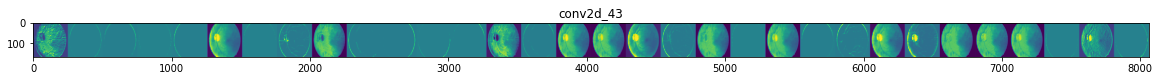

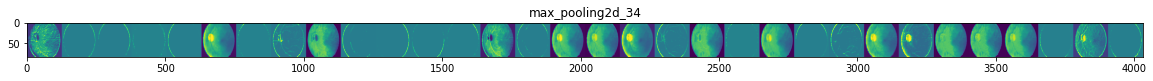

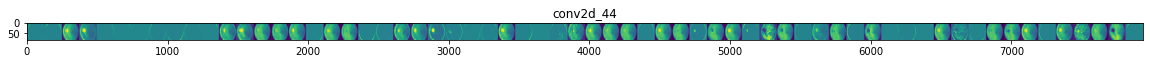

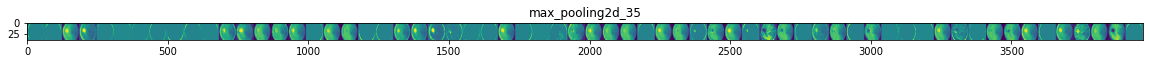

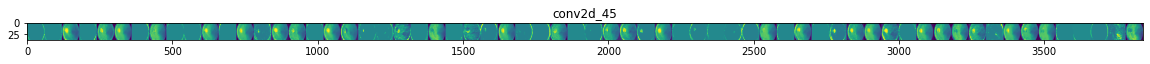

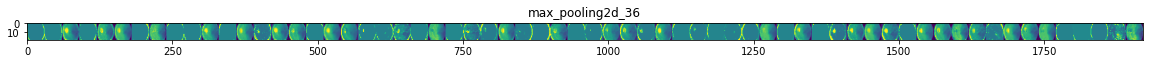

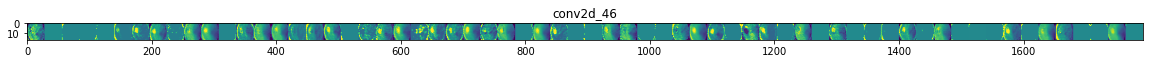

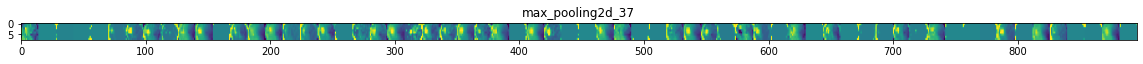

In [67]:
show_image_chained_layers(model_conv1,340,510, 0)

In [68]:
model_conv1.fit(
    train_data ,
    epochs=30,
    steps_per_epoch= len(train_data),
    validation_data = validation_data,
    validation_steps = len(validation_data)
)

Epoch 1/30
38/38 [==============================] - 22s 567ms/step - loss: 0.7005 - accuracy: 0.5290 - val_loss: 0.6898 - val_accuracy: 0.5298
Epoch 2/30
38/38 [==============================] - 26s 687ms/step - loss: 0.6889 - accuracy: 0.5307 - val_loss: 0.6813 - val_accuracy: 0.5298
Epoch 3/30
38/38 [==============================] - 25s 657ms/step - loss: 0.6865 - accuracy: 0.5274 - val_loss: 0.6752 - val_accuracy: 0.5629
Epoch 4/30
38/38 [==============================] - 23s 612ms/step - loss: 0.6761 - accuracy: 0.5564 - val_loss: 0.6699 - val_accuracy: 0.6722
Epoch 5/30
38/38 [==============================] - 22s 583ms/step - loss: 0.6638 - accuracy: 0.6144 - val_loss: 0.6776 - val_accuracy: 0.5993
Epoch 6/30
38/38 [==============================] - 21s 549ms/step - loss: 0.6490 - accuracy: 0.6302 - val_loss: 0.6398 - val_accuracy: 0.6689
Epoch 7/30
38/38 [==============================] - 19s 492ms/step - loss: 0.6191 - accuracy: 0.6824 - val_loss: 0.6356 - val_accuracy: 0.6391



---


# Model 2 : CONV (8 8 16 16 64 128)
I try with 5 CONV layers that extract features and compact the pictures in 8x14 pixel images.  

This model have **1,2 milions** neurons and **6 CONVS**

Well, here the performance after 30 epochs:

* Accuracy training : **96%**
* Accuracy validation : **73%** flat here (better then before) 
* Input image to Dense layers : 3x6 pixel  


There is still ovefitting, the validation curves diverges 25bp from the training one.  
Again  increasing layers + maxpool  + neurons seem that nothing change in overfitting but accuracy of the validation is increased faster in the epochs. 

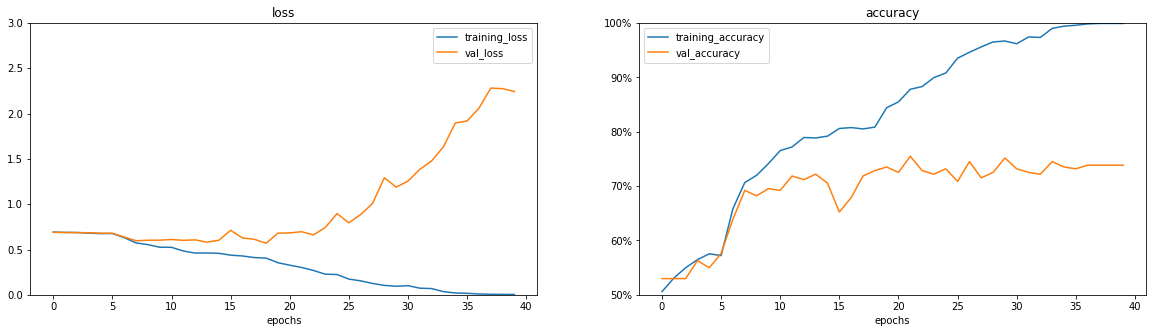

In [77]:
show_performance(model_vgg16A.history)

In [75]:
tf.keras.backend.clear_session()
# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1/255)
validation_datagen = ImageDataGenerator(rescale=1/255)

# Flow training images in batches of 128 using train_datagen generator
train_data = train_datagen.flow_from_directory(
        TRAIN_DIR,  # This is the source directory for training images
        target_size=(340,510),  # All images will be resized to 300x300
        batch_size=32,
        # Since you use binary_crossentropy loss, you need binary labels
        class_mode='binary')

# Flow validation images in batches of 128 using validation_datagen generator
validation_data = validation_datagen.flow_from_directory(
        VALIDATION_DIR,  # This is the source directory for validation images
        target_size=(340,510),  # All images will be resized to 300x300
        batch_size=32,
        # Since you use binary_crossentropy loss, you need binary labels
        class_mode='binary')
# the input specific shape 228,342
model_vgg16A= Sequential([
    Conv2D(8,(3,3), activation="relu", input_shape= (340,510,3) ),
    MaxPool2D(2,2),
    Conv2D(8,(3,3), activation='relu'),
    MaxPool2D(2,2), 
    Conv2D(16,(3,3), activation='relu'),
    MaxPool2D(2,2), 
    Conv2D(16,(3,3), activation='relu'),
    MaxPool2D(2,2), 
    Conv2D(64,(3,3), activation='relu'),
    MaxPool2D(2,2), 
    Conv2D(128,(3,3), activation='relu'),  
    MaxPool2D(2,2), 
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')
])

model_vgg16A.compile(
    optimizer = Adam(),
    loss = 'binary_crossentropy',
    metrics = ['accuracy']
)
model_vgg16A.summary()

Found 1206 images belonging to 2 classes.
Found 302 images belonging to 2 classes.
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 338, 508, 8)       224       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 169, 254, 8)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 167, 252, 8)       584       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 83, 126, 8)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 81, 124, 16)       1168      
                                       

In [76]:
history = model_vgg16A.fit(
      train_data,
      steps_per_epoch=len(train_data),  
      epochs=40,
      verbose=1,
      validation_data = validation_data,
      validation_steps=len(validation_data))

Epoch 1/40
38/38 [==============================] - 21s 508ms/step - loss: 0.6926 - accuracy: 0.5058 - val_loss: 0.6892 - val_accuracy: 0.5298
Epoch 2/40
38/38 [==============================] - 19s 490ms/step - loss: 0.6883 - accuracy: 0.5307 - val_loss: 0.6879 - val_accuracy: 0.5298
Epoch 3/40
38/38 [==============================] - 22s 592ms/step - loss: 0.6876 - accuracy: 0.5498 - val_loss: 0.6864 - val_accuracy: 0.5298
Epoch 4/40
38/38 [==============================] - 21s 559ms/step - loss: 0.6807 - accuracy: 0.5647 - val_loss: 0.6851 - val_accuracy: 0.5629
Epoch 5/40
38/38 [==============================] - 19s 511ms/step - loss: 0.6755 - accuracy: 0.5755 - val_loss: 0.6799 - val_accuracy: 0.5497
Epoch 6/40
38/38 [==============================] - 20s 516ms/step - loss: 0.6767 - accuracy: 0.5721 - val_loss: 0.6788 - val_accuracy: 0.5762
Epoch 7/40
38/38 [==============================] - 19s 507ms/step - loss: 0.6313 - accuracy: 0.6584 - val_loss: 0.6377 - val_accuracy: 0.6391



---


# Adding more data

So adding more Layers and neurons speed up the CNN learning rate but something else must change if overfitting is not reducing over the 70% .
Neural network are hungry of data so let's see if this is the case **feeding more data to the model**.  

This is  what i try: 

* first more data form the sane  images (we have tons of them)
* second i will increase the diabetic images including the few that we have in the sever class  
* then I will compare the baseline and model 2 trained in these augmented data.



---


# Generating 1800 images  

Let's what happens to the models perfromanca adding **300 images (+15%)** the data generator.  
These added images are all of sane retina .

In [79]:
# Preparing the data

#Empty to prevent unclear trainig/validation data or FieExistError if the function runs several times
root_dir ='./retina1800'
if(os.path.exists(root_dir)):
  shutil.rmtree(root_dir)
  print(f"existing tree {root_dir} deleted.")
# Unzip the forst dataset 
local_zip = '/content/drive/MyDrive/Colab_Notebooks/retina/retina_severe1800_CNN.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall(root_dir)
zip_ref.close()
print(f"Unzipperd files in tree {root_dir} .")

source_path = './retina1800/content/retina_CNN'

training_sane = os.path.join(source_path,'training/sane')
training_diabetic = os.path.join(source_path,'training/diabetic')
validation_sane = os.path.join(source_path,'validation/sane')
validation_diabetic = os.path.join(source_path,'validation/diabetic')
#os..listdir return a list containing all the files in the given path
# Walk through sane diabetic directory and list number of files
for dirpath, dirnames, filenames in os.walk(source_path):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")


existing tree ./retina1800 deleted.
Unzipperd files in tree ./retina1800 .
There are 2 directories and 0 images in './retina1800/content/retina_CNN'.
There are 2 directories and 0 images in './retina1800/content/retina_CNN/training'.
There are 0 directories and 566 images in './retina1800/content/retina_CNN/training/diabetic'.
There are 0 directories and 1440 images in './retina1800/content/retina_CNN/training/sane'.
There are 2 directories and 0 images in './retina1800/content/retina_CNN/validation'.
There are 0 directories and 142 images in './retina1800/content/retina_CNN/validation/diabetic'.
There are 0 directories and 360 images in './retina1800/content/retina_CNN/validation/sane'.


In [ ]:
TRAIN_DIR = os.path.join(source_path,'training')
VALIDATION_DIR = os.path.join(source_path,'validation')
print(TRAIN_DIR)
print(VALIDATION_DIR)

#target size of the images
#note that it resize automatically.
#instead of setting the defaul (300,300), in this case even if it is not necessary i have halfed the original size
# (340, 510)


train_generator = ImageDataGenerator(rescale=1/255.)  
validation_generator = ImageDataGenerator(rescale= 1/255.)

train_data_1800 = train_generator.flow_from_directory(  
    directory = TRAIN_DIR,   # target direcory of the images
    target_size = (340, 510), 
    class_mode ='binary',
    batch_size = 32
)
validation_data_1800 = validation_generator.flow_from_directory(  
    directory = VALIDATION_DIR,   # target direcory of the images
    target_size = (340, 510), #target size of the images, note tha it resamples automatically
    class_mode ='binary',
    batch_size = 32)




---


# Baseline : training on 1800 images

In the baseline notable is that there is only 1 neuron waiting the output of the Flatten layer!

Addig 15% more images the results are :

* Accuracy training : 100% in 20 epocs (vs 97% with 1500 images)
* Accuracy validation : **75%** flat in 20 epocs (vss 61% with 1500 images)

There is ovefitting but decreased : the validation curves diverges of 25 bp  from the training accuracy (vs 30bp).

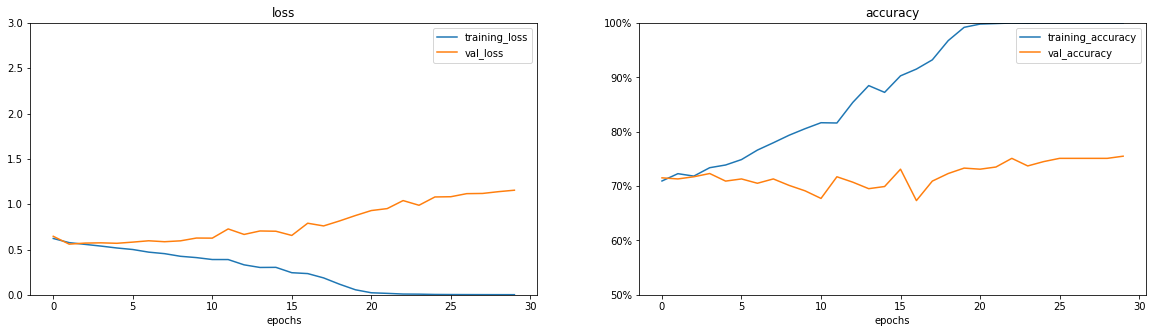

In [92]:
show_performance(model_baseline_1800.history)

In [88]:

#model  re-instance
model_baseline_1800 = Sequential([
    Conv2D(filters= 10,             #is the # of sliding windows going across the images input (higher = more caomplex model)
           kernel_size=(3,3),       # the size of the sliding windows      
           padding = 'valid',       #  if "same", output shape is same as input shape, if "valid", output shape gets compressed
           input_shape= (340, 510,3),# the input specific shape 228,342
           activation="relu"),
    Conv2D(10,3, activation='relu'),
    Conv2D(10,3, activation='relu'),
    Flatten(),
    Dense(1, activation='sigmoid')
])

# add loss metrics and optimizer 
model_baseline_1800.compile(
    optimizer = Adam(),
    loss = 'binary_crossentropy',
    metrics = ['accuracy']
)

# view the CNN
model_baseline_1800.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 338, 508, 10)      280       
                                                                 
 conv2d_10 (Conv2D)          (None, 336, 506, 10)      910       
                                                                 
 conv2d_11 (Conv2D)          (None, 334, 504, 10)      910       
                                                                 
 flatten_2 (Flatten)         (None, 1683360)           0         
                                                                 
 dense_3 (Dense)             (None, 1)                 1683361   
                                                                 
Total params: 1,685,461
Trainable params: 1,685,461
Non-trainable params: 0
_________________________________________________________________


In [89]:
history = model_baseline_1800.fit(
      train_data_1800,
      steps_per_epoch=len(train_data_1800),  
      epochs=30,
      verbose=1,
      validation_data = validation_data_1800,
      validation_steps=len(validation_data_1800))

Epoch 1/30
63/63 [==============================] - 32s 502ms/step - loss: 0.6217 - accuracy: 0.7094 - val_loss: 0.6457 - val_accuracy: 0.7151
Epoch 2/30
63/63 [==============================] - 30s 481ms/step - loss: 0.5758 - accuracy: 0.7228 - val_loss: 0.5591 - val_accuracy: 0.7131
Epoch 3/30
63/63 [==============================] - 36s 576ms/step - loss: 0.5566 - accuracy: 0.7183 - val_loss: 0.5707 - val_accuracy: 0.7171
Epoch 4/30
63/63 [==============================] - 30s 479ms/step - loss: 0.5377 - accuracy: 0.7338 - val_loss: 0.5736 - val_accuracy: 0.7231
Epoch 5/30
63/63 [==============================] - 33s 514ms/step - loss: 0.5167 - accuracy: 0.7388 - val_loss: 0.5685 - val_accuracy: 0.7092
Epoch 6/30
63/63 [==============================] - 33s 521ms/step - loss: 0.5000 - accuracy: 0.7488 - val_loss: 0.5815 - val_accuracy: 0.7131
Epoch 7/30
63/63 [==============================] - 30s 484ms/step - loss: 0.4709 - accuracy: 0.7662 - val_loss: 0.5962 - val_accuracy: 0.7052



---


# Model 2 : training on 1800 images

Addig 15% more images to tran the model the results are :

* Accuracy training : 83% in 20 epocs (vs 96% with 1500 images)
* Accuracy validation : 73% flat in 20 epocs (vs 73% with 1500 images)

There is ovefitting but decreased : the validation curves diverges of 10bp from the training accuracy (vs 25bp).  

Also the model is laerning better because there tho curves runs more closely, and this with 15% images added.

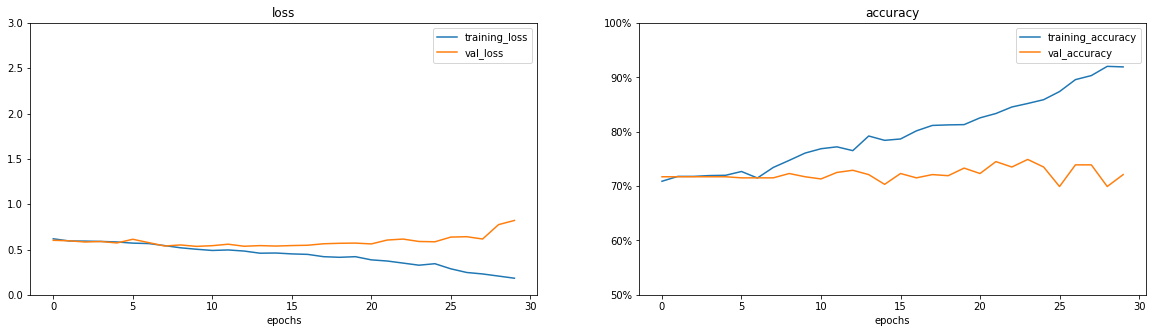

In [94]:
show_performance(model_vgg16A_1800.history)

In [90]:
# the input specific shape 228,342
model_vgg16A_1800= Sequential([
    Conv2D(8,(3,3), activation="relu", input_shape= (340,510,3) ),
    MaxPool2D(2,2),
    Conv2D(8,(3,3), activation='relu'),
    MaxPool2D(2,2), 
    Conv2D(16,(3,3), activation='relu'),
    MaxPool2D(2,2), 
    Conv2D(16,(3,3), activation='relu'),
    MaxPool2D(2,2), 
    Conv2D(64,(3,3), activation='relu'),
    MaxPool2D(2,2), 
    Conv2D(128,(3,3), activation='relu'),  
    MaxPool2D(2,2), 
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')
])

model_vgg16A_1800.compile(
    optimizer = Adam(),
    loss = 'binary_crossentropy',
    metrics = ['accuracy']
)
model_vgg16A_1800.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 338, 508, 8)       224       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 169, 254, 8)      0         
 2D)                                                             
                                                                 
 conv2d_13 (Conv2D)          (None, 167, 252, 8)       584       
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 83, 126, 8)       0         
 2D)                                                             
                                                                 
 conv2d_14 (Conv2D)          (None, 81, 124, 16)       1168      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 40, 62, 16)      

In [93]:
history = model_vgg16A_1800.fit(
      train_data_1800,
      steps_per_epoch=len(train_data_1800),  
      epochs=30,
      verbose=1,
      validation_data = validation_data_1800,
      validation_steps=len(validation_data_1800))

Epoch 1/30
63/63 [==============================] - 29s 443ms/step - loss: 0.6182 - accuracy: 0.7089 - val_loss: 0.6015 - val_accuracy: 0.7171
Epoch 2/30
63/63 [==============================] - 28s 436ms/step - loss: 0.5941 - accuracy: 0.7178 - val_loss: 0.5959 - val_accuracy: 0.7171
Epoch 3/30
63/63 [==============================] - 28s 447ms/step - loss: 0.5926 - accuracy: 0.7178 - val_loss: 0.5828 - val_accuracy: 0.7171
Epoch 4/30
63/63 [==============================] - 31s 496ms/step - loss: 0.5891 - accuracy: 0.7193 - val_loss: 0.5882 - val_accuracy: 0.7171
Epoch 5/30
63/63 [==============================] - 31s 491ms/step - loss: 0.5831 - accuracy: 0.7198 - val_loss: 0.5723 - val_accuracy: 0.7171
Epoch 6/30
63/63 [==============================] - 33s 523ms/step - loss: 0.5704 - accuracy: 0.7268 - val_loss: 0.6130 - val_accuracy: 0.7151
Epoch 7/30
63/63 [==============================] - 32s 505ms/step - loss: 0.5655 - accuracy: 0.7149 - val_loss: 0.5760 - val_accuracy: 0.7151



---


# Generating 3k images

Now let's see how performance changes if we feed the models with double images the the first training.  
In this case more images of retina with severe diagnosis are added to balance the overall classes. 

In [95]:
# Preparing the data

#Empty to prevent unclear trainig/validation data or FieExistError if the function runs several times
root_dir ='./retina3k'
if(os.path.exists(root_dir)):
  shutil.rmtree(root_dir)
  print(f"existing tree {root_dir} deleted.")
# Unzip the forst dataset 
local_zip = '/content/drive/MyDrive/Colab_Notebooks/retina/retina_severe3k_CNN.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall(root_dir)
zip_ref.close()
print(f"Unzipperd files in tree {root_dir} .")

source_path = './retina3k/content/retina_CNN'

training_sane = os.path.join(source_path,'training/sane')
training_diabetic = os.path.join(source_path,'training/diabetic')
validation_sane = os.path.join(source_path,'validation/sane')
validation_diabetic = os.path.join(source_path,'validation/diabetic')
#os..listdir return a list containing all the files in the given path
# Walk through sane diabetic directory and list number of files
for dirpath, dirnames, filenames in os.walk(source_path):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

Unzipperd files in tree ./retina3k .
There are 2 directories and 0 images in './retina3k/content/retina_CNN'.
There are 2 directories and 0 images in './retina3k/content/retina_CNN/training'.
There are 0 directories and 1264 images in './retina3k/content/retina_CNN/training/diabetic'.
There are 0 directories and 1440 images in './retina3k/content/retina_CNN/training/sane'.
There are 2 directories and 0 images in './retina3k/content/retina_CNN/validation'.
There are 0 directories and 317 images in './retina3k/content/retina_CNN/validation/diabetic'.
There are 0 directories and 360 images in './retina3k/content/retina_CNN/validation/sane'.




---


# Baseline : training on 3k images

In the baseline notable is that there is only 1 neuron waiting the output of the Flatten layer!

Addig 15% more images the results are :

* Accuracy training : 100% in 20 epocs (vs 97% with 1500 images)
* Accuracy validation : 75% flat in 20 epocs (vss 61% with 1500 images)

There is claerly an ovefitting but in only 10 epocs model reach 100% in training.

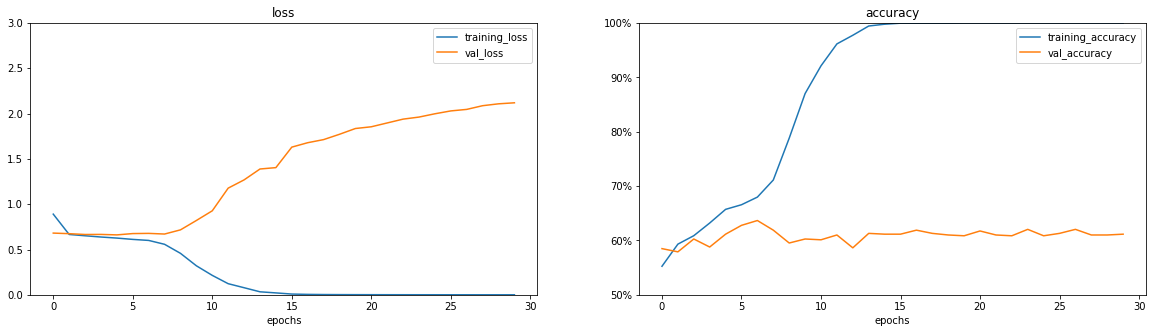

In [100]:
show_performance(model_baseline_3k.history)

In [96]:
TRAIN_DIR = os.path.join(source_path,'training')
VALIDATION_DIR = os.path.join(source_path,'validation')
print(TRAIN_DIR)
print(VALIDATION_DIR)

#target size of the images
#note that it resize automatically.
#instead of setting the defaul (300,300), in this case even if it is not necessary i have halfed the original size
# (340, 510)

train_generator = ImageDataGenerator(rescale=1/255.)  
validation_generator = ImageDataGenerator(rescale= 1/255.)

train_data_3k = train_generator.flow_from_directory(  
    directory = TRAIN_DIR,   # target direcory of the images
    target_size = (340, 510), 
    class_mode ='binary',
    batch_size = 32
)
validation_data_3k = validation_generator.flow_from_directory(  
    directory = VALIDATION_DIR,   # target direcory of the images
    target_size = (340, 510), #target size of the images, note tha it resamples automatically
    class_mode ='binary',
    batch_size = 32)

./retina3k/content/retina_CNN/training
./retina3k/content/retina_CNN/validation
Found 2704 images belonging to 2 classes.
Found 677 images belonging to 2 classes.


In [97]:
#model  re-instance
model_baseline_3k = Sequential([
    Conv2D(filters= 10,             #is the # of sliding windows going across the images input (higher = more caomplex model)
           kernel_size=(3,3),       # the size of the sliding windows      
           padding = 'valid',       #  if "same", output shape is same as input shape, if "valid", output shape gets compressed
           input_shape= (340, 510,3),# the input specific shape 228,342
           activation="relu"),
    Conv2D(10,3, activation='relu'),
    Conv2D(10,3, activation='relu'),
    Flatten(),
    Dense(1, activation='sigmoid')
])

# add loss metrics and optimizer 
model_baseline_3k.compile(
    optimizer = Adam(),
    loss = 'binary_crossentropy',
    metrics = ['accuracy']
)

# view the CNN
model_baseline_3k.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 338, 508, 10)      280       
                                                                 
 conv2d_19 (Conv2D)          (None, 336, 506, 10)      910       
                                                                 
 conv2d_20 (Conv2D)          (None, 334, 504, 10)      910       
                                                                 
 flatten_4 (Flatten)         (None, 1683360)           0         
                                                                 
 dense_6 (Dense)             (None, 1)                 1683361   
                                                                 
Total params: 1,685,461
Trainable params: 1,685,461
Non-trainable params: 0
_________________________________________________________________


In [98]:
history = model_baseline_3k.fit(
      train_data_3k,
      steps_per_epoch=len(train_data_3k),  
      epochs=30,
      verbose=1,
      validation_data = validation_data_3k,
      validation_steps=len(validation_data_3k))

Epoch 1/30
85/85 [==============================] - 45s 527ms/step - loss: 0.8904 - accuracy: 0.5525 - val_loss: 0.6811 - val_accuracy: 0.5849
Epoch 2/30
85/85 [==============================] - 43s 506ms/step - loss: 0.6659 - accuracy: 0.5932 - val_loss: 0.6747 - val_accuracy: 0.5790
Epoch 3/30
85/85 [==============================] - 48s 558ms/step - loss: 0.6516 - accuracy: 0.6087 - val_loss: 0.6656 - val_accuracy: 0.6027
Epoch 4/30
85/85 [==============================] - 46s 545ms/step - loss: 0.6378 - accuracy: 0.6320 - val_loss: 0.6665 - val_accuracy: 0.5879
Epoch 5/30
85/85 [==============================] - 45s 530ms/step - loss: 0.6261 - accuracy: 0.6572 - val_loss: 0.6613 - val_accuracy: 0.6115
Epoch 6/30
85/85 [==============================] - 41s 479ms/step - loss: 0.6115 - accuracy: 0.6657 - val_loss: 0.6758 - val_accuracy: 0.6278
Epoch 7/30
85/85 [==============================] - 39s 455ms/step - loss: 0.6002 - accuracy: 0.6797 - val_loss: 0.6779 - val_accuracy: 0.6366



---


# Model 2 : training on 3k images

Addig 50% more images **on each class** the results after 30 epochs are :

* Accuracy training : **98%** (vs 96%)
* Accuracy validation : **75%** flat here (better then before, was 73%) 
* Input image to Dense layers : 3x6 pixel  

There is still ovefitting, the validation curves diverges 25bp from the training one.  
Again  increasing layers + maxpool  + neurons seem that nothing change in overfitting.

**But adding more images increased the accuracy of the validation. **

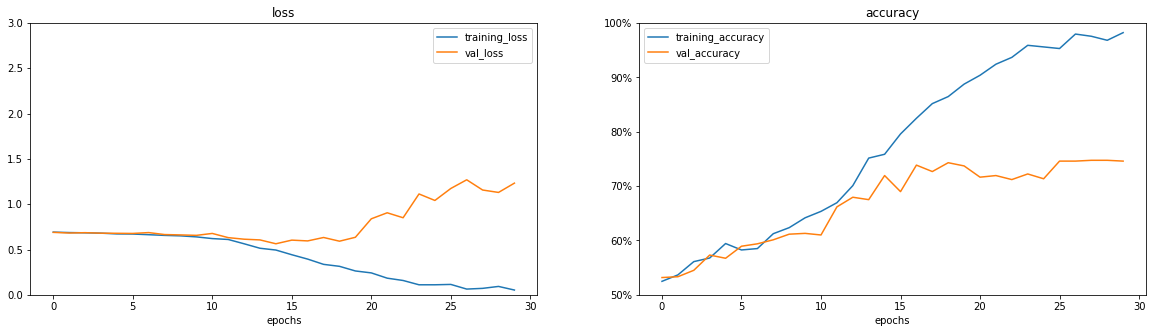

In [103]:
show_performance(model_vgg16A_3k.history)

In [101]:
# the input specific shape 228,342
model_vgg16A_3k= Sequential([
    Conv2D(8,(3,3), activation="relu", input_shape= (340,510,3) ),
    MaxPool2D(2,2),
    Conv2D(8,(3,3), activation='relu'),
    MaxPool2D(2,2), 
    Conv2D(16,(3,3), activation='relu'),
    MaxPool2D(2,2), 
    Conv2D(16,(3,3), activation='relu'),
    MaxPool2D(2,2), 
    Conv2D(64,(3,3), activation='relu'),
    MaxPool2D(2,2), 
    Conv2D(128,(3,3), activation='relu'),  
    MaxPool2D(2,2), 
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')
])

model_vgg16A_3k.compile(
    optimizer = Adam(),
    loss = 'binary_crossentropy',
    metrics = ['accuracy']
)
model_vgg16A_3k.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_21 (Conv2D)          (None, 338, 508, 8)       224       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 169, 254, 8)      0         
 g2D)                                                            
                                                                 
 conv2d_22 (Conv2D)          (None, 167, 252, 8)       584       
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 83, 126, 8)       0         
 g2D)                                                            
                                                                 
 conv2d_23 (Conv2D)          (None, 81, 124, 16)       1168      
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 40, 62, 16)      

In [102]:
history = model_vgg16A_3k.fit(
      train_data_3k,
      steps_per_epoch=len(train_data_3k),  
      epochs=30,
      verbose=1,
      validation_data = validation_data_3k,
      validation_steps=len(validation_data_3k))

Epoch 1/30
85/85 [==============================] - 44s 509ms/step - loss: 0.6920 - accuracy: 0.5248 - val_loss: 0.6890 - val_accuracy: 0.5318
Epoch 2/30
85/85 [==============================] - 41s 477ms/step - loss: 0.6870 - accuracy: 0.5366 - val_loss: 0.6819 - val_accuracy: 0.5332
Epoch 3/30
85/85 [==============================] - 37s 430ms/step - loss: 0.6842 - accuracy: 0.5610 - val_loss: 0.6857 - val_accuracy: 0.5451
Epoch 4/30
85/85 [==============================] - 36s 428ms/step - loss: 0.6804 - accuracy: 0.5677 - val_loss: 0.6802 - val_accuracy: 0.5731
Epoch 5/30
85/85 [==============================] - 37s 433ms/step - loss: 0.6720 - accuracy: 0.5943 - val_loss: 0.6788 - val_accuracy: 0.5672
Epoch 6/30
85/85 [==============================] - 38s 452ms/step - loss: 0.6707 - accuracy: 0.5825 - val_loss: 0.6772 - val_accuracy: 0.5894
Epoch 7/30
85/85 [==============================] - 37s 430ms/step - loss: 0.6633 - accuracy: 0.5851 - val_loss: 0.6867 - val_accuracy: 0.5938